In [1]:
import glob, os
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats


In [2]:
genome_sizes = {
        'a_alpina': 325371069,
        'a_thaliana': 119482458,
        'b_gravinae_unkown': 496599596,
        'b_gravinae': 447263091,
        'm_nitens': 512643005,
        'b_oleracea': 445656625,
        'b_tournefortii' : 267350275,
        'c_annua' : 470740126,
        'c_gynandra' : 666303941,
        'd_erucoides': 436227736,
        'd_tenuifolia': 508838298,
        'd_viminea' : 296913823,
        'h_incana1': 348212977,
        'h_incana3': 322751194,
        'm_arvensis': 677121145,
        'm_moricandioides': 490809355,
        'm_nitens': 512643005,
        'm_suffruticosa': 488720028,
        }

ccp = {'a_alpina' : 60.02,
    'a_thaliana' : 60.02, 
 'b_gravinae': 32.24,
 'b_oleracea' : 50.52,
 'b_tournefortii': 47.46,
 'c_annua' : 55.33,
 'c_gynandra' : 4.28,
 'd_erucoides': 33.04,
 'd_tenuifolia' : 12.68,
 'd_viminea' : 51.08,
 'h_incana1' : 50.50,
 'h_incana3' : 38.37,
 'm_arvensis' : 24.42,
 'm_moricandioides' : 51.59,
 'm_nitens' : 21.04,
 'm_suffruticosa' : 24.87}

### load fragmented TEs

In [3]:
os.chdir("<EDTA_results_directory>/fragmented/")
files_frag = {}
for file in glob.glob("*.gff3"):
    raw = pd.read_csv(file, sep = '\t', header = None, index_col=0)
    TE_gff = raw[~raw[2].isin(['long_terminal_repeat', 'repeat_region', 'target_site_duplication'])] #delete all rows containing TIR TSD and repeat info
    files_frag['_'.join(file.split('.fasta')[0].split('_')[:2])] = TE_gff
files_frag = dict(sorted(files_frag.items()))

#find all TE types
tes = []
for i in files_frag.keys():
    tes.append(list(files_frag[i][2]))
    
tes = list(set(list(itertools.chain.from_iterable(tes))))

df_frag = pd.DataFrame()
df_frag['TE_type']= tes
for species in files_frag.keys():
    Te_freq = {}
    for te in tes:
        Te_freq[te] = len(files_frag[species][files_frag[species][2] == te][2])
    df_frag[species] = list(Te_freq.values())

/home/setri100/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### amount of bp covered by fragmented TE:

In [4]:
df_fra = pd.DataFrame()
df_fra['TE_type']= tes
for species in files_frag.keys():
    Te_freq = {}
    for te in tes:
        Te_freq[te] = sum(files_frag[species][files_frag[species][2] == te][4] - files_frag[species][files_frag[species][2] == te][3])
    df_fra[species] = list(Te_freq.values())

,TE_type,a_alpina,a_thaliana,b_gravinae,b_oleracea,b_tournefortii,c_annua,c_gynandra,d_erucoides,d_tenuifolia,d_viminea,h_incana1,h_incana3,m_arvensis,m_moricandioides,m_nitens,m_suffruticosa
0,PIF_Harbinger_TIR_transposon,3548904,282147,6294436,11358419,2583096,7311553,6133263,5680423,6571767,2211704,2819213,2849445,10729381,6001887,8436582,8487496
1,helitron,36207418,6810232,101175778,20007037,37110416,80237408,97756006,61361091,72742573,48155404,61813853,46933667,68472253,45842453,35079973,42812247
2,hAT_TIR_transposon,3713133,256389,5214378,13773410,3348309,2977267,5378497,2556696,4878548,2325268,4618424,3644566,7565611,4257514,4498826,3802683
3,Gypsy_LTR_retrotransposon,68715062,5480603,84314790,39192902,15262946,99535846,80952822,58171560,98711434,32628924,23021510,15470215,98968493,78653369,80172252,66743120
4,Copia_LTR_retrotransposon,24100911,1439621,35400678,28085585,7943087,34170363,35917150,40728297,41434578,15432251,13896181,14012829,95720351,48405612,57613820,51309868
5,LTR_retrotransposon,15769031,779856,19532564,15245703,6257301,32295949,24807539,16973699,35756589,8830475,8822593,12811534,85957986,42729895,44217594,31498973
6,LINE_element,622467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Tc1_Mariner_TIR_transposon,3416700,93848,1142401,5246037,356452,2257639,1000842,2203893,2567613,1276437,1355886,1731362,3438203,4621010,2421835,2129003
8,Mutator_TIR_transposon,13881650,1780871,13891150,25654730,4216885,18826600,14165874,12203133,18771920,7220638,7449585,6300282,55811640,51386318,45451438,42783278
9,CACTA_TIR_transposon,9114111,815719,15131530,20734424,3827415,22076317,15559381,6656215,19096255,5926281,8920863,5962963,27304214,13000460,15149583,15404745


### calculate fragmented TEs as percentage of genome and run some statistics

In [5]:
df_percent_fragmented = pd.DataFrame()
df_percent_fragmented['TE_type'] = df_fra['TE_type']
for i in df_fra.columns[1:]:
    df_percent_fragmented[i] = df_fra[i] / genome_sizes[i]*100
df_percent_fragmented.style.set_caption('Genome-Percentage of nucleotides spanned by fragmented transposons') 


#add ccp and transpose for anova?
df_percent_fragmented_t = df_percent_fragmented.T
df_percent_fragmented_t.columns = df_percent_fragmented_t.iloc[0]
df_percent_fragmented_t = df_percent_fragmented_t.drop(df_percent_fragmented_t.index[0])
ccp_list = []
for i in list(df_percent_fragmented_t.index):
    ccp_list.append(ccp[i])
df_percent_fragmented_t['CCP'] = ccp_list
df_percent_fragmented_t



TE_type,hAT_TIR_transposon,LINE_element,Gypsy_LTR_retrotransposon,PIF_Harbinger_TIR_transposon,Mutator_TIR_transposon,LTR_retrotransposon,Copia_LTR_retrotransposon,Tc1_Mariner_TIR_transposon,CACTA_TIR_transposon,helitron,CCP
a_alpina,1.141199,0.19131,21.118983,1.090725,4.266406,4.846476,7.407208,1.050093,2.801144,11.128039,60.02
a_thaliana,0.214583,0.0,4.586952,0.236141,1.490487,0.652695,1.204881,0.078545,0.68271,5.699776,60.02
b_gravinae,1.165841,0.0,18.851274,1.407323,3.105812,4.367131,7.914956,0.25542,3.383139,22.621088,32.24
b_oleracea,3.090588,0.0,8.794417,2.548693,5.756614,3.420953,6.302068,1.177148,4.652556,4.489339,50.52
b_tournefortii,1.252405,0.0,5.70897,0.966184,1.577288,2.340488,2.971041,0.133328,1.431611,13.880822,47.46
c_annua,0.632465,0.0,21.144542,1.553204,3.999362,6.860675,7.258859,0.479593,4.689704,17.044948,55.33
c_gynandra,0.807214,0.0,12.149534,0.92049,2.126038,3.723157,5.390505,0.150208,2.335178,14.671383,4.28
d_erucoides,0.586092,0.0,13.335136,1.302169,2.797423,3.891018,9.336476,0.505216,1.525858,14.066297,33.04
d_tenuifolia,0.958762,0.0,19.399372,1.291524,3.689172,7.027103,8.142976,0.504603,3.752912,14.295813,12.68
d_viminea,0.783146,0.0,10.989358,0.744898,2.431897,2.974087,5.197552,0.429902,1.99596,16.218647,51.08


In [6]:
#round values to avoid anova warning
for col in list(df_percent_fragmented_t.columns):
    df_percent_fragmented_t[col] = [round(m, 5) for m in list(df_percent_fragmented_t[col])]
p_values = {}
rsq_values = {}
for i in list(df_percent_fragmented_t.columns):
    model = ols('CCP ~' + i, data = df_percent_fragmented_t).fit()
    anova_table = sm.stats.anova_lm(model, typ = 1)
    d, s, d, f, p = anova_table.loc[i]
    p_values[i] = p
    rsq_values[i] = model.rsquared
    

p_values

{'hAT_TIR_transposon': 0.659365827781125,
 'LINE_element': 0.21223448396010758,
 'Gypsy_LTR_retrotransposon': 0.45098580423585555,
 'PIF_Harbinger_TIR_transposon': 0.4405732109459942,
 'Mutator_TIR_transposon': 0.5293274196509863,
 'LTR_retrotransposon': 0.13894288056902626,
 'Copia_LTR_retrotransposon': 0.08020221442574843,
 'Tc1_Mariner_TIR_transposon': 0.23898267653165706,
 'CACTA_TIR_transposon': 0.5448926471304187,
 'helitron': 0.7167542790725558,
 'CCP': 1.9244371953685258e-215}

In [7]:
c3 = df_percent_fragmented[['TE_type', 'a_thaliana', 'a_alpina' ,'m_moricandioides', 'h_incana1', 'b_oleracea', 'd_viminea', 'b_tournefortii', 'c_annua']]
c34 = df_percent_fragmented[['TE_type', 'b_gravinae', 'd_erucoides', 'm_arvensis', 'd_tenuifolia', 'h_incana3', 'm_suffruticosa']]

#calculate means seperately
df_means_frag = pd.DataFrame()
df_means_frag['TE_type'] = df_fra['TE_type']
means = []
for i in range(len(c3)):
    means.append(np.mean(c3.iloc[i][1:]))
df_means_frag['c3_mean'] = means
means = []
for i in range(len(c34)):
    means.append(np.mean(c34.iloc[i][1:]))
df_means_frag['c34_mean'] = means

#sort customly for pie
sorter = ['Gypsy_LTR_retrotransposon', 'Copia_LTR_retrotransposon', 'LTR_retrotransposon', 'helitron', 
         'CACTA_TIR_transposon', 'PIF_Harbinger_TIR_transposon', 'Mutator_TIR_transposon','hAT_TIR_transposon','Tc1_Mariner_TIR_transposon']
df_means_frag = df_means_frag.set_index(['TE_type'])
df_means_frag = df_means_frag.loc[sorter]
df_means_frag

,c3_mean,c34_mean
TE_type,,
Gypsy_LTR_retrotransposon,11.872474,14.108634
Copia_LTR_retrotransposon,5.524341,9.061881
LTR_retrotransposon,4.041882,6.399092
helitron,11.944185,14.066214
CACTA_TIR_transposon,2.683045,2.948984
PIF_Harbinger_TIR_transposon,1.146540,1.367519
Mutator_TIR_transposon,4.016393,4.756850
hAT_TIR_transposon,1.163519,0.955887
Tc1_Mariner_TIR_transposon,0.584938,0.457512


### visualize

In [9]:
c3 = df_percent_fragmented[['TE_type', 'a_thaliana', 'a_alpina' ,'m_moricandioides', 'h_incana1', 'b_oleracea', 'd_viminea', 'b_tournefortii', 'c_annua']]
c34 = df_percent_fragmented[['TE_type', 'b_gravinae', 'd_erucoides', 'm_arvensis', 'd_tenuifolia', 'h_incana3', 'm_suffruticosa']]

sorter = ['Gypsy_LTR_retrotransposon', 'Copia_LTR_retrotransposon', 'LTR_retrotransposon', 'helitron', 
         'CACTA_TIR_transposon', 'PIF_Harbinger_TIR_transposon', 'Mutator_TIR_transposon','hAT_TIR_transposon','Tc1_Mariner_TIR_transposon']
c3 = c3.set_index(['TE_type'])
c3 = c3.loc[sorter]
c34 = c34.set_index(['TE_type'])
c34 = c34.loc[sorter]

In [10]:
c3

,a_thaliana,a_alpina,m_moricandioides,h_incana1,b_oleracea,d_viminea,b_tournefortii,c_annua
TE_type,,,,,,,,
Gypsy_LTR_retrotransposon,4.586952,21.118983,16.025238,6.611330,8.794417,10.989358,5.708970,21.144542
Copia_LTR_retrotransposon,1.204881,7.407208,9.862406,3.990713,6.302068,5.197552,2.971041,7.258859
LTR_retrotransposon,0.652695,4.846476,8.706007,2.533677,3.420953,2.974087,2.340488,6.860675
helitron,5.699776,11.128039,9.340175,17.751737,4.489339,16.218647,13.880822,17.044948
CACTA_TIR_transposon,0.682710,2.801144,2.648780,2.561898,4.652556,1.995960,1.431611,4.689704
PIF_Harbinger_TIR_transposon,0.236141,1.090725,1.222855,0.809623,2.548693,0.744898,0.966184,1.553204
Mutator_TIR_transposon,1.490487,4.266406,10.469710,2.139376,5.756614,2.431897,1.577288,3.999362
hAT_TIR_transposon,0.214583,1.141199,0.867448,1.326322,3.090588,0.783146,1.252405,0.632465
Tc1_Mariner_TIR_transposon,0.078545,1.050093,0.941508,0.389384,1.177148,0.429902,0.133328,0.479593


In [11]:
c34

,b_gravinae,d_erucoides,m_arvensis,d_tenuifolia,h_incana3,m_suffruticosa
TE_type,,,,,,
Gypsy_LTR_retrotransposon,18.851274,13.335136,14.616069,19.399372,4.793232,13.656719
Copia_LTR_retrotransposon,7.914956,9.336476,14.136370,8.142976,4.341682,10.498827
LTR_retrotransposon,4.367131,3.891018,12.694624,7.027103,3.969477,6.445198
helitron,22.621088,14.066297,10.112260,14.295813,14.541749,8.760076
CACTA_TIR_transposon,3.383139,1.525858,4.032397,3.752912,1.847542,3.152059
PIF_Harbinger_TIR_transposon,1.407323,1.302169,1.584559,1.291524,0.882861,1.736679
Mutator_TIR_transposon,3.105812,2.797423,8.242490,3.689172,1.952055,8.754149
hAT_TIR_transposon,1.165841,0.586092,1.117320,0.958762,1.129218,0.778090
Tc1_Mariner_TIR_transposon,0.255420,0.505216,0.507768,0.504603,0.536439,0.435628


### load intact TEs:

In [7]:
os.chdir("<EDTA_Results>")
files = {}
for file in glob.glob("*.fasta.mod.EDTA.intact.gff3"):
    raw = pd.read_csv(file, sep = '\t', header = None, index_col=0)
    TE_gff = raw[~raw[2].isin(['long_terminal_repeat', 'repeat_region', 'target_site_duplication'])] #delete all rows containing TIR TSD and repeat info
    files['_'.join(file.split('.fasta')[0].split('_')[:2])] = TE_gff
files = dict(sorted(files.items()))


#find all TE types
tes = []
for i in files.keys():
    tes.append(list(files[i][2]))
    
tes = list(set(list(itertools.chain.from_iterable(tes))))

df_intact = pd.DataFrame()
df_intact['TE_type']= tes
for species in files.keys():
    Te_freq = {}
    for te in tes:
        Te_freq[te] = len(files[species][files[species][2] == te][2])
    df_intact[species] = list(Te_freq.values())

In [12]:
df_intact

,TE_type,a_alpina,a_thaliana,b_gravinae,b_oleracea,b_tournefortii,c_annua,c_gynandra,d_erucoides,d_tenuifolia,d_viminea,h_incana1,h_incana3,m_arvensis,m_moricandioides,m_nitens,m_suffruticosa
0,PIF_Harbinger_TIR_transposon,288000,88183,603600,800456,190200,558942,603600,727088,704321,287953,369819,321909,985403,480214,690942,710820
1,helitron,4251923,2299011,8830897,826329,2749909,5904465,8830897,5703347,6339503,4527871,5764595,5278897,4821498,3912993,2268897,3066111
2,LTR_retrotransposon,3123978,130009,1630641,637706,631581,2165889,1630641,4527060,4438499,867510,1259087,824632,10282725,4856692,2331152,2589557
3,hAT_TIR_transposon,819795,62727,782337,842101,330249,479461,782337,550138,804545,402403,704214,512367,646184,390279,397762,384330
4,Gypsy_LTR_retrotransposon,14726312,662749,6839456,1738304,1925882,14758173,6839456,15975282,12453042,4599526,4184065,1316940,12058322,5857448,4862412,5161506
5,Copia_LTR_retrotransposon,5944186,535014,8555242,2786336,1857195,6325093,8555242,18406158,9732049,4433727,4145629,2277544,20828053,9371432,7477461,9142294
6,Tc1_Mariner_TIR_transposon,342099,38703,185635,198223,73018,168316,185635,204482,172134,122600,189639,166198,269146,234987,155442,159493
7,Mutator_TIR_transposon,1690813,445805,1539886,1059201,642484,1234801,1539886,1553813,1729206,965610,999495,828149,2448115,1409252,1543786,1724839
8,CACTA_TIR_transposon,1267740,278812,1694162,1438319,629605,1444604,1694162,1111777,2034018,859490,1114421,772760,2368267,1197256,1127538,1155320


### nucleotides covered by intact TEs

In [8]:
df_intact = pd.DataFrame()
df_intact['TE_type']= tes
for species in files.keys():
    Te_freq = {}
    for te in tes:
        Te_freq[te] = sum(files[species][files[species][2] == te][4] - files[species][files[species][2] == te][3])
    df_intact[species] = list(Te_freq.values())
df_intact
df_intact.style.set_caption('Number of nucleotides spanned by intact transposons') 

#add ccp and transpose for anova?
df_intact_t = df_intact.T
df_intact_t.columns = df_intact_t.iloc[0]
df_intact_t = df_intact_t.drop(df_intact_t.index[0])
ccp_list = []
for i in list(df_intact_t.index):
    ccp_list.append(ccp[i])
df_intact_t['CCP'] = ccp_list
df_intact_t




TE_type,PIF_Harbinger_TIR_transposon,helitron,LTR_retrotransposon,hAT_TIR_transposon,Gypsy_LTR_retrotransposon,Copia_LTR_retrotransposon,Tc1_Mariner_TIR_transposon,Mutator_TIR_transposon,CACTA_TIR_transposon,CCP
a_alpina,288000,4251923,3123978,819795,14726312,5944186,342099,1690813,1267740,60.02
a_thaliana,88183,2299011,130009,62727,662749,535014,38703,445805,278812,60.02
b_gravinae,603600,8830897,1630641,782337,6839456,8555242,185635,1539886,1694162,32.24
b_oleracea,800456,826329,637706,842101,1738304,2786336,198223,1059201,1438319,50.52
b_tournefortii,190200,2749909,631581,330249,1925882,1857195,73018,642484,629605,47.46
c_annua,558942,5904465,2165889,479461,14758173,6325093,168316,1234801,1444604,55.33
c_gynandra,603600,8830897,1630641,782337,6839456,8555242,185635,1539886,1694162,4.28
d_erucoides,727088,5703347,4527060,550138,15975282,18406158,204482,1553813,1111777,33.04
d_tenuifolia,704321,6339503,4438499,804545,12453042,9732049,172134,1729206,2034018,12.68
d_viminea,287953,4527871,867510,402403,4599526,4433727,122600,965610,859490,51.08


### percent of genome

In [14]:
df_percent_intact = pd.DataFrame()
df_percent_intact['TE_type'] = df_intact['TE_type']
for i in df_intact.columns[1:]:
    df_percent_intact[i] = df_intact[i] / genome_sizes[i]*100
df_percent_intact.style.set_caption('Percentage of nucleotides spanned by intact transposons') 

#add ccp and transpose for anova?
df_percent_intact_t = df_percent_intact.T
df_percent_intact_t.columns = df_percent_intact_t.iloc[0]
df_percent_intact_t = df_percent_intact_t.drop(df_percent_intact_t.index[0])
ccp_list = []
for i in list(df_percent_intact_t.index):
    ccp_list.append(ccp[i])
df_percent_intact_t['CCP'] = ccp_list
df_percent_intact_t

TE_type,hAT_TIR_transposon,Gypsy_LTR_retrotransposon,PIF_Harbinger_TIR_transposon,Mutator_TIR_transposon,LTR_retrotransposon,Copia_LTR_retrotransposon,Tc1_Mariner_TIR_transposon,CACTA_TIR_transposon,helitron,CCP
a_alpina,0.251957,4.526005,0.088514,0.519657,0.960128,1.826894,0.105141,0.389629,1.306792,60.02
a_thaliana,0.052499,0.554683,0.073804,0.373113,0.10881,0.447776,0.032392,0.23335,1.924141,60.02
b_gravinae,0.174917,1.52918,0.134954,0.344291,0.364582,1.912799,0.041505,0.378784,1.97443,32.24
b_oleracea,0.188957,0.390055,0.179613,0.237672,0.143094,0.62522,0.044479,0.322742,0.185418,50.52
b_tournefortii,0.123527,0.720359,0.071143,0.240315,0.236237,0.694667,0.027312,0.235498,1.028579,47.46
c_annua,0.101853,3.1351,0.118737,0.262311,0.460103,1.343649,0.035756,0.306879,1.254294,55.33
c_gynandra,0.117414,1.026477,0.090589,0.231109,0.244729,1.283985,0.02786,0.254263,1.325356,4.28
d_erucoides,0.126113,3.662143,0.166676,0.356193,1.037774,4.219392,0.046875,0.254862,1.307424,33.04
d_tenuifolia,0.158114,2.447348,0.138417,0.339834,0.872281,1.912602,0.033829,0.399738,1.245878,12.68
d_viminea,0.135529,1.549111,0.096982,0.325216,0.292176,1.493271,0.041291,0.289475,1.524978,51.08


In [15]:
c3 = df_percent_intact[['TE_type', 'a_thaliana', 'a_alpina' ,'m_moricandioides', 'h_incana1', 'b_oleracea', 'd_viminea', 'b_tournefortii', 'c_annua']]
c34 = df_percent_intact[['TE_type', 'b_gravinae', 'd_erucoides', 'm_arvensis', 'd_tenuifolia', 'h_incana3', 'm_nitens', 'm_suffruticosa']]

#calculate means seperately
df_means = pd.DataFrame()
df_means['TE_type'] = df_intact['TE_type']
means = []
for i in range(len(c3)):
    means.append(np.mean(c3.iloc[i][1:]))
df_means['c3_mean'] = means
means = []
for i in range(len(c34)):
    means.append(np.mean(c34.iloc[i][1:]))
df_means['c34_mean'] = means

#sort customly for pie
sorter = ['Gypsy_LTR_retrotransposon', 'Copia_LTR_retrotransposon', 'LTR_retrotransposon', 'helitron', 
         'CACTA_TIR_transposon', 'PIF_Harbinger_TIR_transposon', 'Mutator_TIR_transposon','hAT_TIR_transposon','Tc1_Mariner_TIR_transposon']
newnames = ['Gypsy LTR retrotransposon', 'Copia LTR_retrotransposon', 'LTR retrotransposon', 'Helitron', 
         'CACTA TIR transposon', 'PIF Harbinger TIR transposon', 'Mutator TIR transposon','hAT TIR transposon','Tc1 Mariner TIR_transposon']
df_means = df_means.set_index(['TE_type'])
df_means = df_means.loc[sorter]
df_means['name'] = newnames
df_means

,c3_mean,c34_mean,name
TE_type,,,
Gypsy_LTR_retrotransposon,1.658790,1.690308,Gypsy LTR retrotransposon
Copia_LTR_retrotransposon,1.191426,2.165100,Copia LTR_retrotransposon
LTR_retrotransposon,0.443957,0.719047,LTR retrotransposon
helitron,1.209617,1.135050,Helitron
CACTA_TIR_transposon,0.292693,0.296987,CACTA TIR transposon
PIF_Harbinger_TIR_transposon,0.104105,0.137934,PIF Harbinger TIR transposon
Mutator_TIR_transposon,0.316556,0.330361,Mutator TIR transposon
hAT_TIR_transposon,0.142009,0.124222,hAT TIR transposon
Tc1_Mariner_TIR_transposon,0.048589,0.039487,Tc1 Mariner TIR_transposon


### sum up fragmented and intact TEs and some statistics

In [16]:
df_sum = df_percent_fragmented.drop(columns='TE_type').add(df_percent_intact.drop(columns='TE_type'), fill_value=0)
df_sum['TE_type'] = df_percent_fragmented['TE_type']

c3 = df_sum[['TE_type', 'a_thaliana', 'a_alpina' ,'m_moricandioides', 'h_incana1', 'b_oleracea', 'd_viminea', 'b_tournefortii', 'c_annua']]
c34 = df_sum[['TE_type', 'b_gravinae', 'd_erucoides', 'm_arvensis', 'd_tenuifolia', 'h_incana3', 'm_suffruticosa']]

c3 = c3.set_index(['TE_type'])
c3 = c3.loc[sorter]
c34 = c34.set_index(['TE_type'])
c34 = c34.loc[sorter]

df_sum_t = df_sum.T
df_sum_t.columns = df_sum['TE_type']
df_sum_t = df_sum_t.iloc[:-1]
#df_sum_t = df_sum_t.drop(df_percent_fragmented_t.index[0])
df_sum_t['CCP'] = ccp_list
df_sum_t

for col in list(df_sum_t.columns):
    df_sum_t[col] = [round(m, 5) for m in list(df_sum_t[col])]
p_values = {}
rsq_values = {}
for i in list(df_sum_t.columns):
    model = ols('CCP ~' + i, data = df_sum_t).fit()
    anova_table = sm.stats.anova_lm(model, typ = 1)
    d, s, d, f, p = anova_table.loc[i]
    p_values[i] = p
    rsq_values[i] = model.rsquared
p_values

{'hAT_TIR_transposon': 0.6274814671499274,
 'LINE_element': 0.6434895797612429,
 'Gypsy_LTR_retrotransposon': 0.44723551057046906,
 'PIF_Harbinger_TIR_transposon': 0.49425466930046125,
 'Mutator_TIR_transposon': 0.4975596718183849,
 'LTR_retrotransposon': 0.11065331155757605,
 'Copia_LTR_retrotransposon': 0.08215004042961799,
 'Tc1_Mariner_TIR_transposon': 0.2765681223706139,
 'CACTA_TIR_transposon': 0.749489606017498,
 'helitron': 0.7167542790725558,
 'CCP': 1.9244371953685258e-215}

### visualize

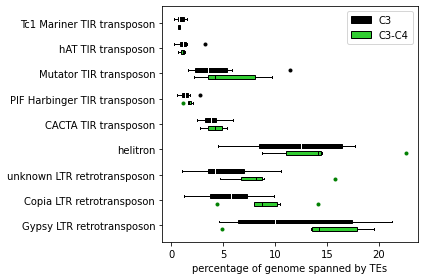

In [17]:
size_fliers = 3
for i in range(len(c3)):
    bp_c3 = plt.boxplot(c3.iloc[i], positions = [i + 2 + 0.15], vert = False, patch_artist=True, 
                        boxprops=dict(facecolor='black', color='k'),
                        medianprops=dict(color='white'),
                        flierprops=dict(color='k', markeredgecolor='k', marker= 'o', markersize= size_fliers, markerfacecolor = 'k'))
    bp_c34 = plt.boxplot(c34.iloc[i], positions = [i+2-0.15], vert = False, patch_artist=True, 
                        boxprops=dict(facecolor='limegreen', color='k'),
                        medianprops=dict(color='k'),
                        flierprops=dict(color='limegreen', markeredgecolor='green', marker= 'o', markersize= size_fliers, markerfacecolor = 'green'))


labels = [' '.join (m.split('_')) for m in list(c3.index)]  
labels[2] = 'unknown LTR retrotransposon'
plt.yticks(list(range(2, 11)), labels = labels)
plt.legend([bp_c3["boxes"][0], bp_c34["boxes"][0]], ['C3', 'C3-C4'], loc='upper right')

plt.xlabel('percentage of genome spanned by TEs')

plt.tight_layout()
plt.show()

#### more statistics, perform 2-way ANOVA

In [123]:
photo = ['c3', 'c3', 'c34', 'c3', 'c3', 'c3', 'c34', 'c34', 'c3', 'c3', 'c34', 'c34', 'c3', 'c34', 'c34']
types = []
perc = []
ps = []
for m in list(range(15)):
    i = df_sum.columns[m]
    perc.append(df_sum[i])
    types.append(list(df_sum['TE_type']))
    ps.append([photo[m]]*10)
ps = [item for sublist in ps for item in sublist]
types = [item for sublist in types for item in sublist]
perc = [item for sublist in perc for item in sublist]

In [131]:
df_anova = pd.DataFrame()
df_anova['TE_type'] = types
df_anova['photosynthesis_type'] = ps
df_anova['percent_of_genome'] = perc

In [132]:
df_anova

,TE_type,photosynthesis_type,percent_of_genome
0,hAT_TIR_transposon,c3,1.393156
1,LINE_element,c3,4.717315
2,Gypsy_LTR_retrotransposon,c3,21.207498
3,PIF_Harbinger_TIR_transposon,c3,1.610382
4,Mutator_TIR_transposon,c3,5.226534
...,...,...,...
145,LTR_retrotransposon,c34,8.315859
146,Copia_LTR_retrotransposon,c34,10.531461
147,Tc1_Mariner_TIR_transposon,c34,0.672025
148,CACTA_TIR_transposon,c34,3.779435


In [133]:
model = ols('percent_of_genome ~ C(TE_type) + C(photosynthesis_type) + C(TE_type):C(photosynthesis_type)', data=df_anova).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TE_type),2772.250457,9.0,32.267873,4.432812e-29
C(photosynthesis_type),61.037368,1.0,6.394052,1.264639e-02
C(TE_type):C(photosynthesis_type),81.533125,9.0,0.949013,4.853980e-01
Residual,1240.974821,130.0,NaN,NaN
